In [31]:

import re
#import pdftotext
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO


def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text



In [33]:

with open('C:\\Users\\ryans\\OneDrive\\Desktop\\Briefcase\\PDFs\\1-ALL PYTHON & R CODE SAMPLES\\Topic Extraction - TfidfVectorizer\\Finance10K.txt') as f:
    clean_cont = f.read().splitlines()


clean_cont


doc=[i.replace('\xe2\x80\x9c','') for i in clean_cont ]
doc=[i.replace('\xe2\x80\x9d','') for i in doc ]
doc=[i.replace('\xe2\x80\x99s','') for i in doc ]

docs = [x for x in doc if x != ' ']
docss = [x for x in docs if x != '']


doc

docs

docss


financedoc=[re.sub("[^a-zA-Z]+", " ", s) for s in docss]
financedoc


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd
#%pylab
#%matplotlib inline
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS


vect=CountVectorizer(ngram_range=(1,1),stop_words='english')


fin=vect.fit_transform(financedoc)


fin


pd.DataFrame(fin.toarray(),columns=vect.get_feature_names())



lda=LatentDirichletAllocation(n_components=5)


lda.fit_transform(fin)


lda_dtf=lda.fit_transform(fin)


sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())


import mglearn
mglearn.tools.print_topics(topics=range(5), feature_names=features,
sorting=sorting, topics_per_chunk=5, n_words=10)



#from __future__ import  print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()



zit=pyLDAvis.sklearn.prepare(lda,fin,vect)



pyLDAvis.show(zit)


topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
securities    total         assets        investment    value         
billion       risk          net           financial     fair          
september     credit        income        common        loans         
mortgage      capital       liabilities   company       losses        
quarter       management    trading       securities    changes       
total         table         period        balance       credit        
months        loans         banking       loan          allowance     
commercial    millions      gains         federal       based         
million       information   investments   wells         sep           
debt          contracts     losses        fargo         accounting    



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.ena

127.0.0.1 - - [19/Jul/2020 11:13:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Jul/2020 11:13:27] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [19/Jul/2020 11:13:27] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Jul/2020 11:13:27] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Jul/2020 11:13:27] code 404, message Not Found
127.0.0.1 - - [19/Jul/2020 11:13:27] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


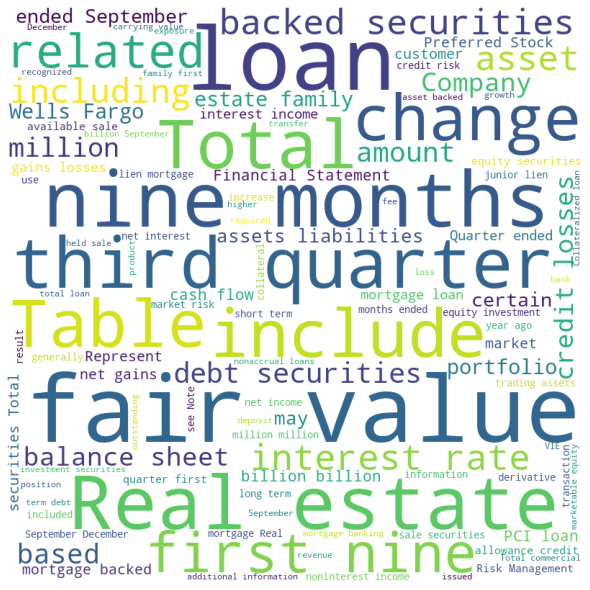

In [37]:

# Generate Word Cloud
# type(clean_cont)
# convert list to string
str = ''.join(clean_cont)

import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


In [29]:

# data:
# https://github.com/aniruddhachoudhury/NLP-Topic-Extraction
